In [8]:
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import requests
path = "../data/"

## Dados Abertos Câmara dos Deputados

Para este projeto iremos acessar a base de dados disponibilizada pelo Governo Federal afim de analisar os dados referentes aos gastos dos nossos deputados e senadores. Esta política de dados abertos foi iniciada em 2016 no governo de Dilma Roussef, com o Decreto 8.777, que instaurou a [Política de Dados Abertos do Poder Executivo federal](http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/D8777.htm).  

Esses dados estão disponibilizados nos portais de Dados Abertos do **Senado Federal** e da **Câmara dos Deputados**. 
 

### Escopo do trabalho

- Neste trabalho iremos usar alguns parâmetros para focar nossos esforços em dados mais proximos da realidade, trabalhando apenas com parlamentares do estado do Nordeste.  
  
  
- Dessa forma, conseguiremos visualizar melhor e encontrar informações a partir dos gastos e dos dados disponibilizados pelo projeto [serenata_de_amor](https://serenata.ai/), que também sera amplamente utilizado.

In [9]:
# Capturando os dados da API das tabelas do serenata
deputados_Nordeste_2019 = requests.get("https://dadosabertos.camara.leg.br/api/v2/deputados?siglaUf=MA&siglaUf=CE&siglaUf=PI&siglaUf=BA&siglaUf=SE&siglaUf=AL&siglaUf=PE&siglaUf=PB&siglaUf=RN&siglaUf=&ordem=ASC&ordenarPor=nome", headers={'Accept':'application/json'}).json()
deputados_Nordeste_2018 = requests.get('https://dadosabertos.camara.leg.br/api/v2/deputados?siglaUf=MA&siglaUf=CE&siglaUf=PI&siglaUf=BA&siglaUf=SE&siglaUf=AL&siglaUf=PE&siglaUf=PB&siglaUf=RN&siglaUf=&dataInicio=2018-01-01&dataFim=2018-12-31', headers= {'Accept':'application/json'}).json()
df_deputados_serenata_2018 = pd.read_csv(path+'Ano-2018.csv', sep=';')
df_deputados_serenata_2019 = pd.read_csv(path+'Ano-2019.csv', sep=';')

In [10]:
nomes_deputados_nordeste_2018 = [dep['nome'] for dep in deputados_Nordeste_2018['dados']]
nomes_deputados_nordeste_2019 = [dep['nome'] for dep in deputados_Nordeste_2019['dados']]

In [11]:
df_deputados_nordeste_2018 = df_deputados_serenata_2018[df_deputados_serenata_2018
                                                   ['txNomeParlamentar'].isin(nomes_deputados_nordeste_2018)]

df_deputados_nordeste_2019 = df_deputados_serenata_2019[df_deputados_serenata_2019
                                                   ['txNomeParlamentar'].isin(nomes_deputados_nordeste_2019)]

Soma das notas fiscais emitidas deputados nordestinos em 2018, que serão pagas pela **CEAP**

In [12]:
df_deputados_nordeste_2018['vlrLiquido'].sum()

66674902.70999999

Soma das notas fiscais emitidas deputados nordestinos em 2018, que serão pagas pela **CEAP**

In [13]:
df_deputados_nordeste_2019['vlrLiquido'].sum()

48032691.20999999

## CEAP por deputado

In [14]:
ceap_deputado_2018 = df_deputados_nordeste_2018.groupby(df_deputados_nordeste_2018['txNomeParlamentar']).sum()['vlrLiquido'].sort_values(ascending=False)

Deputados que mais gastaram no ano de 2018

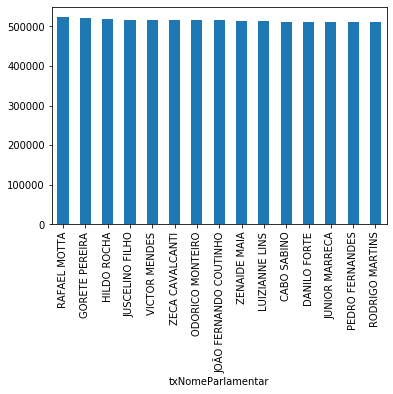

In [15]:
ceap_deputado_2018[:15].plot.bar()

Deputados que menos gastaram no ano de 2018

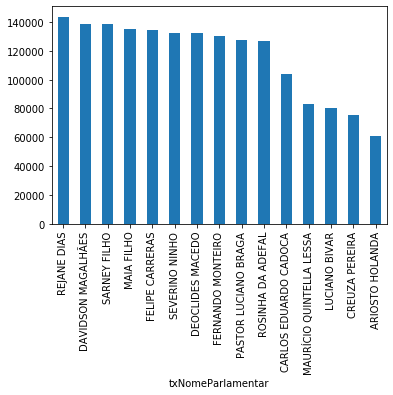

In [16]:
ceap_deputado_2018[-15:].plot.bar()

In [17]:
ceap_deputado_2019 = df_deputados_nordeste_2019.groupby(df_deputados_nordeste_2019['txNomeParlamentar']).sum()['vlrLiquido'].sort_values(ascending=False)

Deputados que mais usaram a CEPA em 2019

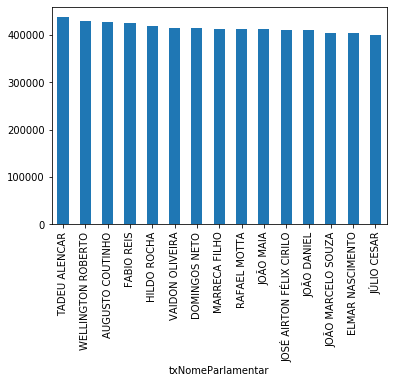

In [18]:
ceap_deputado_2019[:15].plot.bar()

### Analise dos gastos dos deputados nordestidos dentre periodos mensais

- Aqui agrupamos a coluna de valor total da nota fiscal emitida pelo deputado (*vlrLiquido*) pelo número do mês dessa nota. Assim conseguimos visualizar como os gastos totais por mês se comportam no decorrer do ano.

In [57]:
gastos_mensais_2018 = df_deputados_nordeste_2018.groupby(['numMes']).sum()['vlrLiquido']
gastos_mensais_2018

numMes
1     4839066.40
2     5649604.80
3     6390355.89
4     5920585.26
5     6740744.16
6     4475442.11
7     4604694.33
8     3933457.20
9     2851324.04
10    6518182.17
11    7284755.95
12    7466690.40
Name: vlrLiquido, dtype: float64

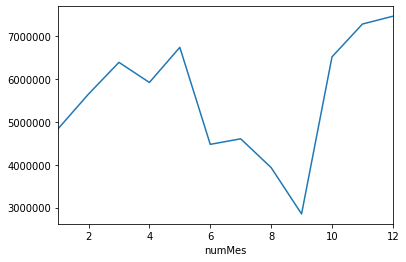

In [58]:
gastos_mensais_2018.plot()

- A partir disso, é possivel verificar que, dentre os meses 6 e 9, os gastos diminuiram drasticamente. Isso aconteceu, possivelmente, pela ocorrência do periodo eleitoral, onde certas atividades são suspensas e/ou possuem limites de gastos que poderão ser custeados pela CEAP.

### Analise de gastos por partido no ano de 2018

- É interessante analisarmos os gastos com a CEAP por partido, tendo em vista que alguns partidos tem muito mais visibilidade e integrantes importantes dentro da camara que outros (o que pode ser visto na Series gerada), mostrando uma grande disparidade de gastos entre os mesmos.  
- Como esses gastos englobam todos os custeios dos deputados, inclusive viagens e etc., vemos como certos partidos tem mais voz e presença.

In [100]:
gasto_partido_2018 = df_deputados_nordeste_2019.groupby('sgPartido').sum()['vlrLiquido'].bb(ascending=False)
gasto_partido_2018

sgPartido
PT               6086350.23
PDT              4613107.54
PP               4567310.44
PL               4467916.50
PSD              4156866.30
PSB              3809323.93
DEM              2700939.02
MDB              2587946.07
REPUBLICANOS     2492027.62
PSDB             1844043.64
PTB              1581915.63
SOLIDARIEDADE    1364166.74
PSL              1339466.44
PROS             1336317.71
PCdoB            1218072.74
PSC               771632.74
PODE              768014.50
PATRIOTA          666845.94
AVANTE            515117.11
CIDADANIA         355590.58
PMN               227586.79
PR                193552.35
PV                190114.92
PRB                80759.70
PPL                44925.75
PATRI              28839.72
PPS                23940.56
Name: vlrLiquido, dtype: float64

In [102]:
nomes_deputados_nordeste_2018 = [dep['siglaPartido'] for dep in deputados_Nordeste_2018['dados']]
qnt_deputados_partido_2018 = pd.Series(nomes_deputados_nordeste_2018).value_counts()
qnt_deputados_partido_2018

PP               19
PT               19
PSB              15
PSDB             14
PDT              14
DEM              13
MDB              13
PSD              12
PR               12
PTB               8
PODE              7
PRB               7
PCdoB             6
AVANTE            5
PROS              5
SOLIDARIEDADE     4
PSC               4
PPS               3
PATRI             3
PHS               2
PRTB              1
PSL               1
PV                1
PPL               1
dtype: int64

In [105]:
pd.DataFrame([qnt_deputados_partido_2018, gasto_partido_2018])

,Unnamed 0,vlrLiquido
PP,19.0,4567310.44
PT,19.0,6086350.23
PSB,15.0,3809323.93
PSDB,14.0,1844043.64
PDT,14.0,4613107.54
DEM,13.0,2700939.02
MDB,13.0,2587946.07
PSD,12.0,4156866.30
PR,12.0,193552.35
PTB,8.0,1581915.63


In [115]:
df_deputados_nordeste_2019[['sgPartido','txNomeParlamentar']]

,sgPartido,txNomeParlamentar
1493,PP,IRACEMA PORTELLA
1494,PP,IRACEMA PORTELLA
1495,PP,IRACEMA PORTELLA
1496,PP,IRACEMA PORTELLA
1497,PP,IRACEMA PORTELLA
...,...,...
224066,PT,JOSEILDO RAMOS
224067,PT,JOSEILDO RAMOS
224068,PT,JOSEILDO RAMOS
224069,PT,JOSEILDO RAMOS


In [113]:
df_deputados_nordeste_2019.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')